# Classification of Fashion MNIST using Keras Sequential API.


In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [3]:
X_train_full.shape

(60000, 28, 28)

In [4]:
X_valid,X_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0
y_valid,y_train = y_train_full[:5000], y_train_full[5000:]

In [5]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
"Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [6]:
class_names[y_train[0]]

'Coat'

In [10]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [11]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 300)               235500    
                                                                 
 dense_7 (Dense)             (None, 100)               30100     
                                                                 
 dense_8 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.layers

In [14]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer='sgd',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=30, 
                    validation_data=(X_valid,y_valid))

Epoch 1/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.7323 - accuracy: 0.7568 - val_loss: 0.5108 - val_accuracy: 0.8272
Epoch 2/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4937 - accuracy: 0.8274 - val_loss: 0.4510 - val_accuracy: 0.8472
Epoch 3/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4483 - accuracy: 0.8431 - val_loss: 0.4223 - val_accuracy: 0.8554
Epoch 4/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4187 - accuracy: 0.8524 - val_loss: 0.4068 - val_accuracy: 0.8630
Epoch 5/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3972 - accuracy: 0.8605 - val_loss: 0.3931 - val_accuracy: 0.8626
Epoch 6/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3808 - accuracy: 0.8657 - val_loss: 0.3927 - val_accuracy: 0.8590
Epoch 7/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3669 - accuracy: 0.8707 - val_loss: 0.3766 - val_accuracy:

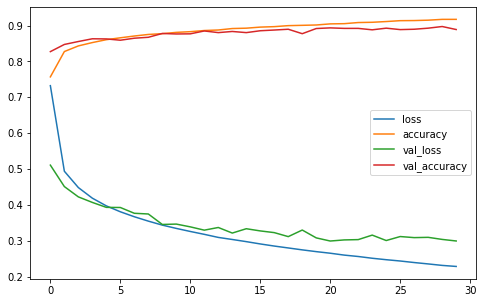

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))

In [16]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 66.2943 - accuracy: 0.8451


[66.29431915283203, 0.8450999855995178]

In [20]:
X_new = X_test[:3]
y_prob = model.predict(X_new)
y_prob

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)